In [1]:
pip install numpy==1.26.4 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow==2.18.0

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.17.1
    Uninstalling tensorflow-intel-2.17.1:
      Successfully uninstalled tensorflow-intel-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
Note: you may need to restart th

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [3]:
import tensorflow as tf

In [4]:
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [6]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
len(gpus)

1

In [8]:
# Avoid OOM errors by setting Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [11]:
#Remove dodgy images
import cv2
import imghdr


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13520\3632158455.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [12]:
import os
from matplotlib import pyplot as plt

In [13]:
data_dir = 'data'

In [14]:
#Use of os
os.listdir(data_dir)

['happy', 'sad']

In [15]:
os.listdir(data_dir)

['happy', 'sad']

In [16]:
image_exts = ['jpeg','jpg','bmp','png']

In [17]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [19]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)


In [20]:
img = cv2.imread(os.path.join('data','happy','960x0.jpg'))

In [21]:
img.shape

(640, 960, 3)

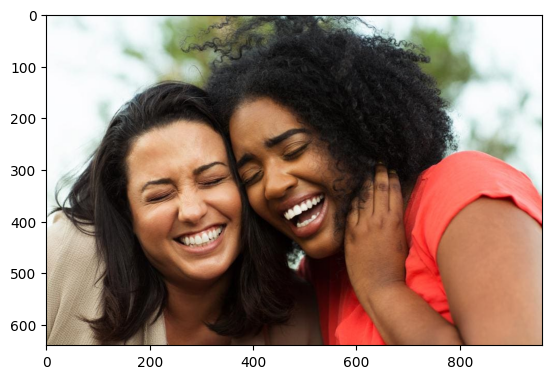

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
#Load data
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 136 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [27]:
len(batch)

2

In [28]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [29]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

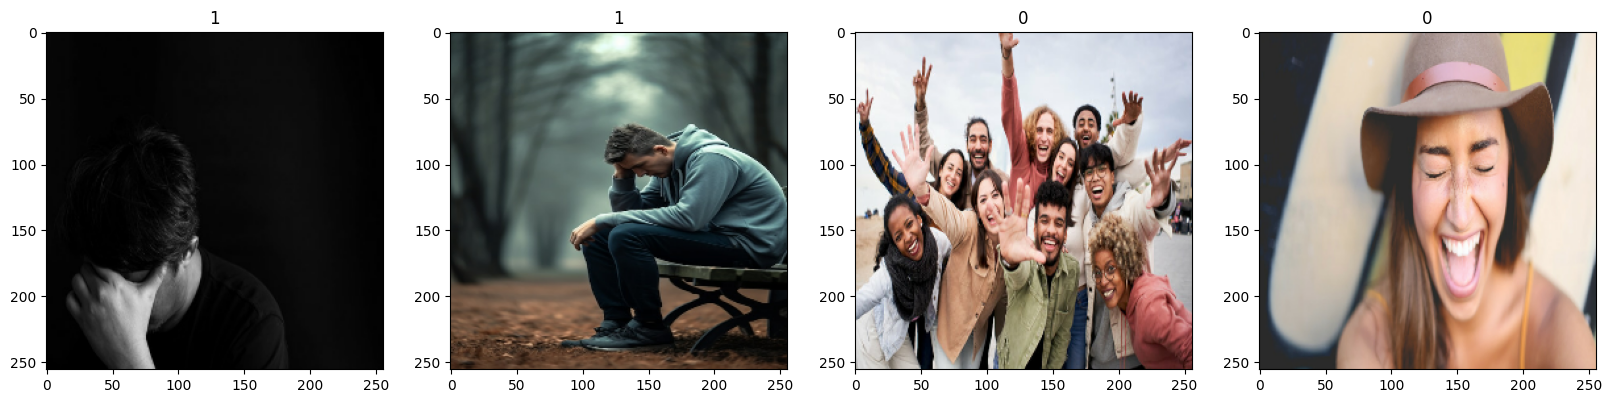

In [30]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
scaled = batch[0]/ 255

In [32]:
scaled.max()

1.0

In [33]:
#Preprocessing data
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

In [34]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [35]:
!pip install --upgrade pip

!pip install tensorflow-addons==0.18.0





ERROR: Could not find a version that satisfies the requirement tensorflow-addons==0.18.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-addons==0.18.0


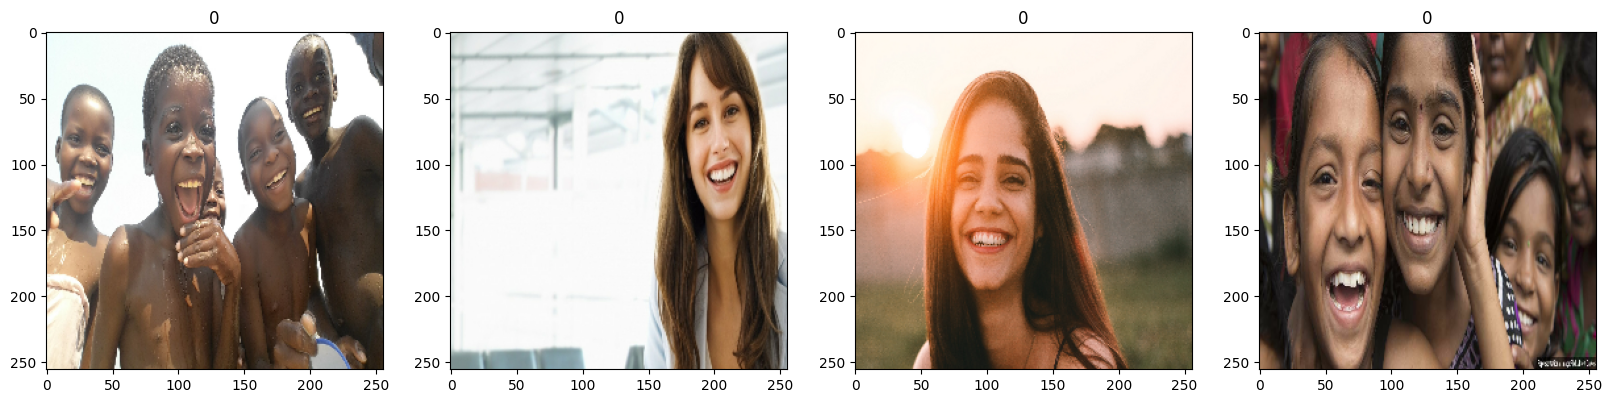

In [36]:
ig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [37]:
len(data)

5

In [38]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)


In [39]:
train_size

3

In [40]:
val_size

1

In [41]:
test_size

1

In [42]:
train_size + val_size + test_size 


5

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [44]:
len(train)

3

In [45]:
#Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [46]:
model = Sequential()

In [47]:
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


D:\ASUS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
#Train
logdir = 'logs'

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 972ms/step - accuracy: 0.7656 - loss: 0.9931 - val_accuracy: 0.2188 - val_loss: 1.0884
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 0.4948 - loss: 0.8023 - val_accuracy: 0.7188 - val_loss: 0.4623
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.7708 - loss: 0.4643 - val_accuracy: 0.6875 - val_loss: 0.5552
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 0.7448 - loss: 0.4649 - val_accuracy: 0.8438 - val_loss: 0.4052
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/step - accuracy: 0.7982 - loss: 0.4578 - val_accuracy: 0.8125 - val_loss: 0.4596
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 483ms/step - accuracy: 0.8151 - loss: 0.4289 - val_accuracy: 0.8438 - val_loss: 0.4266
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step - accuracy: 0.8568 - loss: 0.4075 - val_accuracy: 0.9062 - val_loss: 0.2592
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.8854 - loss: 0.3227 - val_accuracy: 0.9375 - val_loss:

In [52]:
hist.params

{'verbose': 'auto', 'epochs': 20, 'steps': 3}

In [53]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [54]:
hist.history['accuracy']

[0.75,
 0.5833333134651184,
 0.7604166865348816,
 0.7395833134651184,
 0.7604166865348816,
 0.8020833134651184,
 0.8541666865348816,
 0.8958333134651184,
 0.8645833134651184,
 0.84375,
 0.875,
 0.9166666865348816,
 0.9270833134651184,
 0.8958333134651184,
 0.9791666865348816,
 0.96875,
 0.9479166865348816,
 0.96875,
 0.9375,
 0.9895833134651184]

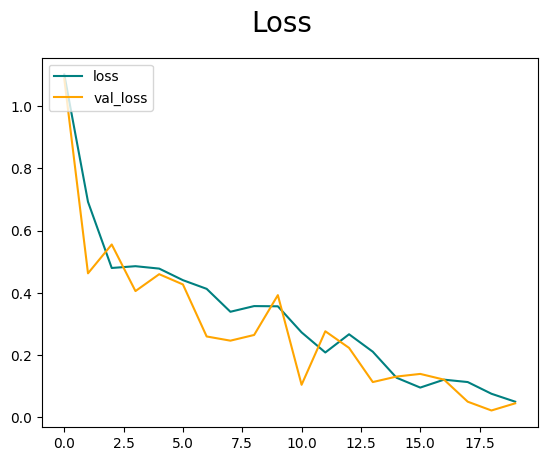

In [55]:
# Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

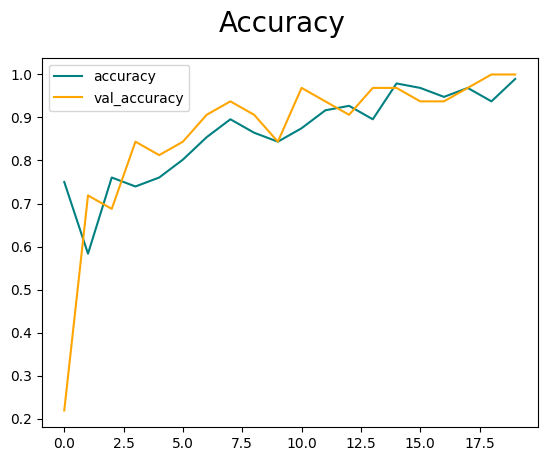

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [57]:
# Evaluate performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [58]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [59]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy}')

Precision:0.0, Recall:0.0,Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


In [60]:
# Load and preprocess the image
img = cv2.imread('Happy face.jpg')  # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = tf.image.resize(img, (256, 256))  # Resize to match training data
img = img / 255.0  # Normalize (same as training)

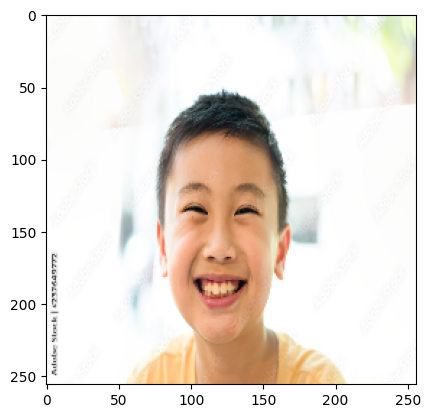

In [61]:
plt.imshow(img)
plt.show()

In [62]:
# Expand dimensions to match model input shape
img_input = np.expand_dims(img, axis=0)  # Shape: (1, 256, 256, 3)


In [63]:
# Predict
yhat = model.predict(img_input)[0][0]  # Get the probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [64]:
# Print the predicted probability
print(f'Predicted probability: {yhat:.4f}')

# Adjust classification threshold if necessary
if yhat < 0.5:  # Assuming "Happy" = 0 and "Sad" = 1
    print('Predicted class: Happy')
else:
    print('Predicted class: Sad')

Predicted probability: 0.0881
Predicted class: Happy


<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13520\1440962577.py:3: SyntaxWarning: invalid escape sequence '\A'
  image_folder = "D:\ASUS\image classification\image classification\deep-CNN-Classifier-for-any-images\data\happy"  # Update this with your actual folder path


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: nm-how-happiness-affects-health-tnail.jpg, Prediction Score: 0.0224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image: images28.jpg, Prediction Score: 0.0016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: image27.jpeg, Prediction Score: 0.0025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 988689_Wallpaper2.jpg, Prediction Score: 0.0004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: goup-happy-people-35582464.jpg, Prediction Score: 0.0103


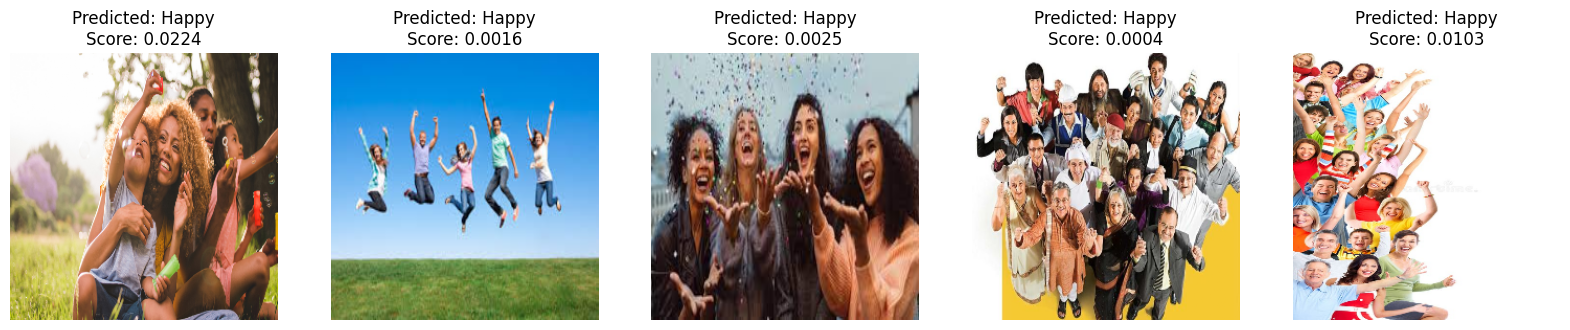

In [65]:
import random
#  Load 5 random images from the dataset folder
image_folder = "D:\ASUS\image classification\image classification\deep-CNN-Classifier-for-any-images\data\happy"  # Update this with your actual folder path
image_files = random.sample(os.listdir(image_folder), 5)  # Select 5 random images

fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Create subplots for 5 images

for i, img_name in enumerate(image_files):
    # Read and preprocess the image
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = tf.image.resize(img, (256, 256))  # Resize
    img = img / 255.0  # Normalize

    # Expand dimensions for model input
    img_input = np.expand_dims(img, axis=0)

    # Predict
    yhat = model.predict(img_input)[0][0]  # Extracting the scalar value

    # Debug: Print raw output
    print(f"Image: {img_name}, Prediction Score: {yhat:.4f}")

    # Determine class label based on different thresholds
    if yhat >= 0.6:  # Adjust threshold if needed
        predicted_label = "Sad"
    elif yhat <= 0.4:
        predicted_label = "Happy"
    else:
        predicted_label = "Uncertain"  # If within 0.4 - 0.6, consider uncertain

    # Display image with prediction
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Predicted: {predicted_label}\nScore: {yhat:.4f}")

plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13520\2202667369.py:3: SyntaxWarning: invalid escape sequence '\A'
  image_folder = "D:\ASUS\image classification\image classification\deep-CNN-Classifier-for-any-images\data\sad"  # Update this with your actual folder path


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: 8iAb9k4aT.jpg, Prediction Score: 0.9323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 73705bd7debb66c2afc780a22c223804.jpg, Prediction Score: 0.9880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image: crying-at-work.jpg, Prediction Score: 0.9816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image: 960x0.jpg, Prediction Score: 0.9413
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: Crying-girl.jpg, Prediction Score: 0.8923


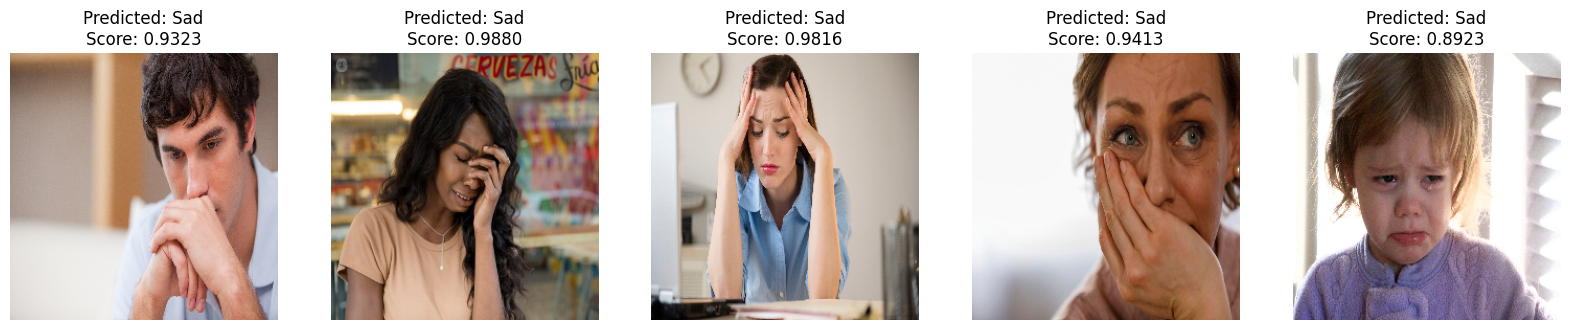

In [66]:
import random
#  Load 5 random images from the dataset folder
image_folder = "D:\ASUS\image classification\image classification\deep-CNN-Classifier-for-any-images\data\sad"  # Update this with your actual folder path
image_files = random.sample(os.listdir(image_folder), 5)  # Select 5 random images

fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Create subplots for 5 images

for i, img_name in enumerate(image_files):
    # Read and preprocess the image
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = tf.image.resize(img, (256, 256))  # Resize
    img = img / 255.0  # Normalize

    # Expand dimensions for model input
    img_input = np.expand_dims(img, axis=0)

    # Predict
    yhat = model.predict(img_input)[0][0]  # Extracting the scalar value

    # Debug: Print raw output
    print(f"Image: {img_name}, Prediction Score: {yhat:.4f}")

    # Determine class label based on different thresholds
    if yhat >= 0.6:  # Adjust threshold if needed
        predicted_label = "Sad"
    elif yhat <= 0.4:
        predicted_label = "Happy"
    else:
        predicted_label = "Uncertain"  # If within 0.4 - 0.6, consider uncertain

    # Display image with prediction
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Predicted: {predicted_label}\nScore: {yhat:.4f}")

plt.show()

In [67]:
# Define the folder path where the model will be saved
model_dir = "D:/ASUS/image classification/image classification/deep-CNN-Classifier-for-any-images/new_model"

# Define the path to save the model
model_path = os.path.join(model_dir, "cnn_model.h5")

# Save the model
model.save(model_path)

print(f"Model saved successfully at: {model_path}")

Model saved successfully at: D:/ASUS/image classification/image classification/deep-CNN-Classifier-for-any-images/new_model\cnn_model.h5
